In [5]:
import sys
from pathlib import Path

In [9]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Below is just a demo of the features.
Refer to [Utilities API Reference](https://ajkdrag.github.io/ocrtoolkit/ocrtoolkit/utilities/det_utils.html) for details.

## imports

In [10]:
from ocrtoolkit.models import UL_RTDETR

In [15]:
from ocrtoolkit.core import detect, detect_and_save_h5
from ocrtoolkit.datasets import FileDS

In [12]:
from ocrtoolkit.utilities import load_dets, save_dets

## loading models

In [13]:
detection_model = UL_RTDETR(path="../pretrained/best.pt")

2024-03-30 20:51:41.466 | INFO     | ocrtoolkit.wrappers.model:__init__:22 - Loaded model from ../pretrained/best.pt, to cpu


## loading ds

In [14]:
mini_ds = FileDS("../data/public/images/").sample()

  0%|          | 0/237 [00:00<?, ?it/s]

2024-03-30 20:51:41.729 | INFO     | ocrtoolkit.utilities.io_utils:get_files:57 - Found 235 files.


In [16]:
medium_ds = FileDS("../data/public/images/").sample(k=50)

  0%|          | 0/237 [00:00<?, ?it/s]

2024-03-30 20:53:03.613 | INFO     | ocrtoolkit.utilities.io_utils:get_files:57 - Found 235 files.


## running inference

In [7]:
det_results = detect(detection_model, mini_ds, stream=False, verbose=False)

### saving detection results during inference

In [19]:
detect_and_save_h5(detection_model, medium_ds, "temp/medium_dets_save.h5", bs=5, verbose=False)

  0%|          | 0/10 [00:00<?, ?it/s]

2024-03-30 20:53:59.691 | INFO     | ocrtoolkit.utilities.det_utils:save_dets:17 - Detections saved to temp/medium_dets_save.h5


In [20]:
loaded_medium_dets = load_dets("temp/medium_dets_save.h5")

## saving and loading detection result
As of now saving and loading is supported for:
- datasets, e.g. `ds.save(...)` and `ImageDS.load(...)` or `FileDS.load(...)`
- detection results

Saving/loading of recognition results isn't natively supported. Put the recognition results inside detection result bboxes using `det_result[0].set_text_and_confidence(...)`

In [10]:
save_dets(det_results, "temp/demo_dets_save.h5")

2024-03-18 11:36:18.435 | INFO     | ocrtoolkit.utilities.det_utils:save_dets:17 - Detections saved to temp/demo_dets_save.h5


In [11]:
loaded_dets = load_dets("temp/demo_dets_save.h5")

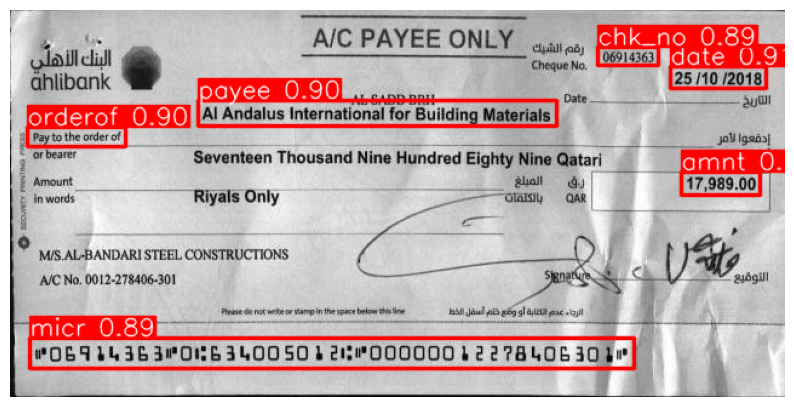

In [13]:
loaded_dets[0].draw(mini_ds, show_label=True, show_conf=True)